In [ ]:
import numpy as np
import pandas as pd

In [ ]:

columns = ['ID', 'Title', 'Genre', 'Plot']

data = []

with open('train_data.txt', 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(' ::: ')

        if len(parts) == 4:

            movie_data = {
                'ID': parts[0],
                'Title': parts[1],
                'Genre': parts[2],
                'Plot': parts[3]
            }
            data.append(movie_data)

df = pd.DataFrame(data, columns=columns)


In [ ]:
df

,ID,Title,Genre,Plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      54214 non-null  object
 1   Title   54214 non-null  object
 2   Genre   54214 non-null  object
 3   Plot    54214 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [ ]:
df.drop(columns=['ID','Title'], inplace=True)

In [ ]:
len(df['Genre'].unique())

27

In [ ]:
df.isnull().sum()

Genre    0
Plot     0
dtype: int64

In [ ]:
df.duplicated().sum()

109

In [ ]:
df = df.drop_duplicates(keep="first")

In [ ]:
df.duplicated().sum()

0

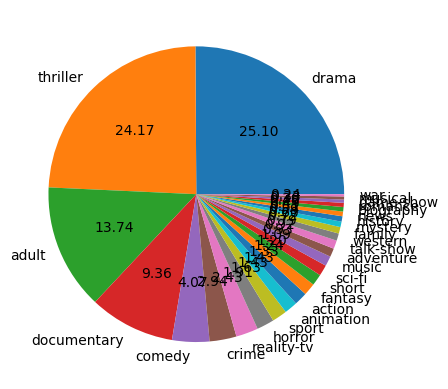

<Figure size 100000x80000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Genre'].value_counts(), labels=df['Genre'].unique(), autopct="%0.2f")
plt.figure(figsize=(1000, 800))
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500, min_font_size=10, background_color='white')

In [ ]:
drama_wc = wc.generate(df[df['Genre'] == 'drama']['Plot'].str.cat(sep=" "))

In [ ]:
drama_wc

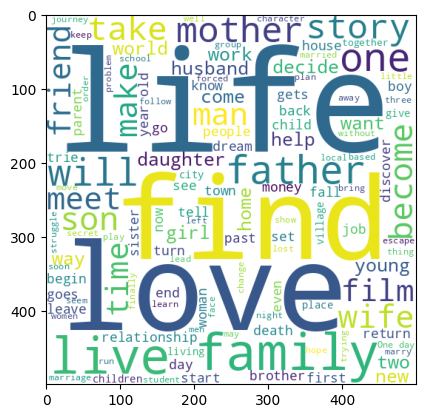

In [ ]:
plt.imshow(drama_wc)

In [ ]:
thriller_wc = wc.generate(df[df['Genre'] == 'thriller']['Plot'].str.cat(sep=" "))

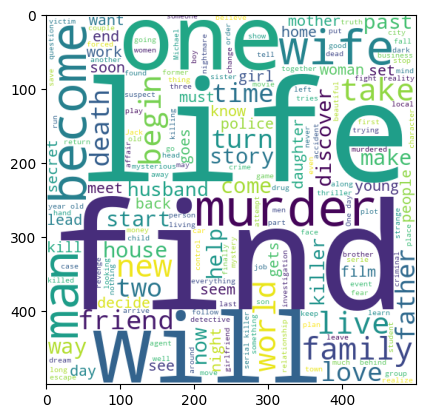

In [ ]:
plt.imshow(thriller_wc)

In [ ]:
adult = wc.generate(df[df['Genre'] == 'adult']['Plot'].str.cat(sep=" "))

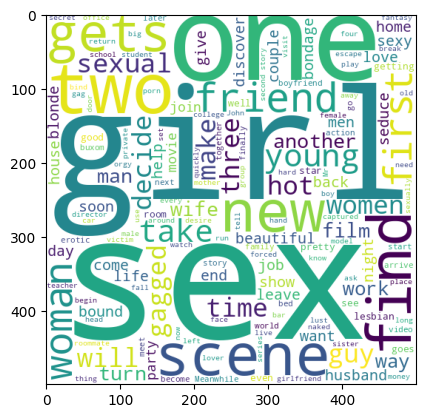

In [ ]:
plt.imshow(adult)

In [ ]:
documentary = wc.generate(df[df['Genre'] == 'documentary']['Plot'].str.cat(sep=" "))

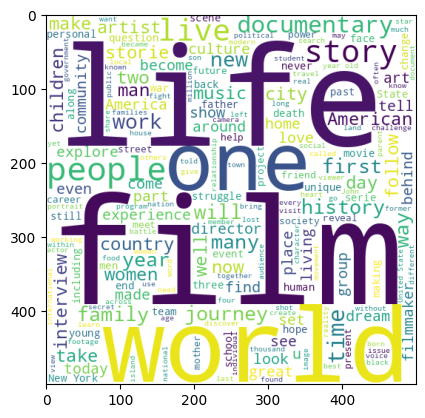

In [ ]:
plt.imshow(documentary)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['Genre'] = encoder.fit_transform(df['Genre'])

<ipython-input-27-971aec46ec4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre'] = encoder.fit_transform(df['Genre'])


In [ ]:
df

,Genre,Plot
0,8,Listening in to a conversation between his doc...
1,24,A brother and sister with a past incestuous re...
2,1,As the bus empties the students for their fiel...
3,8,To help their unemployed father make ends meet...
4,8,The film's title refers not only to the un-rec...
...,...,...
54209,5,This short-lived NBC live sitcom centered on B...
54210,13,The NEXT Generation of EXPLOITATION. The siste...
54211,7,"Ze bestaan echt, is a stand-up comedy about gr..."
54212,5,Walter and Vivian live in the country and have...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(df['Plot'])

In [ ]:
y = df['Genre'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
mnb = MultinomialNB()
from sklearn.model_selection import GridSearchCV

In [ ]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print("Accuracy without tuning:",accuracy_score(y_test, y_pred))

Accuracy without tuning: 0.43914610479622956


In [ ]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_prior': [True, False]
}

grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_fit_prior = grid_search.best_params_['fit_prior']

final_NB_model = MultinomialNB(alpha=best_alpha, fit_prior=best_fit_prior)

final_NB_model.fit(X_train , y_train)


NB_prediction = final_NB_model.predict(X_test)
NB_accuracy   = accuracy_score(NB_prediction , y_test)

print("Accuracy with tuning:",NB_accuracy)

Accuracy with tuning: 0.5356251732741891
